In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import annotations
import numpy as np
import scipy

from mflex.simulate.simulate_boundary import dalmatian

from mhsflex.field2d import Field2dData
from mhsflex.vis import plot, show_poles, show_footpoints
from mhsflex.metrics import compare_field3d

from matplotlib import rc, colors
import matplotlib.pyplot as plt
from scipy.io import readsav

from mhsflex.field2d import check_fluxbalance, alpha_HS04

import mhsflex.fluxbalance

from mhsflex.metrics import VecCorr, CauSchw, NormErr, MeanErr, MagEnergy
from mhsflex.metrics import CauSchw_z, NormErr_z, MeanErr_z
from mhsflex.metrics import field_div_metric_fb, field_div_metric_issi2

rc("font", **{"family": "serif", "serif": ["Times"]})
rc("text", usetex=True)

c4 = (1.000, 0.224, 0.376)
c1 = (0.439, 0.788, 1.000)
c3 = "black"
c2 = (0.420, 0.502, 1.000)

cmap = colors.LinearSegmentedColormap.from_list(
    "cmap",
    (
        (0.000, (0.000, 0.000, 0.000)),
        (0.500, (0.659, 0.659, 0.659)),
        (1.000, (1.000, 1.000, 1.000)),
    ),
)

cmap2 = colors.LinearSegmentedColormap.from_list(
    "cmap2", ((0.000, (0.984, 1.000, 0.000)), (1.000, (1.000, 0.988, 0.761)))
)

c2 = (0.420, 0.502, 1.000)
c3 = "black"
c4 = (1.000, 0.224, 0.376)
c5 = (0.784, 0.231, 0.576)
c7 = (0.992, 0.251, 0.733)
c8 = (0.867, 0.871, 0.184)
c9 = (0.949, 0.922, 0.678)
c10 = (0.984, 0.455, 0.231)
c11 = (0.765, 0.835, 0.922)
c12 = (0.965, 0.694, 0.486)
c13 = (0.992, 0.584, 0.820)

/Users/lilli/Library/Caches/pypoetry/virtualenvs/mflex-cNoQEf_u-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
path = "/Users/lilli/Desktop/mflex/data/RMHD_boundary_data.sav"

data = readsav(path, python_dict=True, verbose=True)

--------------------------------------------------
Date: Tue Sep  6 15:18:26 2022
User: xszhu
Host: HR30
--------------------------------------------------
Format: 9
Architecture: x86_64
Operating System: linux
IDL Version: 7.1.1
--------------------------------------------------
Successfully read 10 records of which:
 - 6 are of type VARIABLE
 - 1 are of type VERSION
 - 1 are of type NOTICE
 - 1 are of type TIMESTAMP
--------------------------------------------------
Available variables:
 - b2dx [<class 'numpy.ndarray'>]
 - b2dy [<class 'numpy.ndarray'>]
 - b2dz [<class 'numpy.ndarray'>]
 - info_unit [<class 'bytes'>]
 - info_pixel [<class 'bytes'>]
 - info_array [<class 'bytes'>]
--------------------------------------------------


In [4]:
data_bz = data["b2dz"]
data_bx = data["b2dx"]
data_by = data["b2dy"]

nresol_x = data_bz.shape[1]
nresol_y = data_bz.shape[0]

pixelsize_z_Mm = 64.0 * 10**-3  # Convert pixelsize from km into Mm
pixelsize_x_Mm = 192.0 * 10**-3
pixelsize_y_Mm = 192.0 * 10**-3

xmin = np.float64(0.0)  # Minimum value of x in data length scale, not in Mm
ymin = np.float64(0.0)  # Minimum value of y in data length scale, not in Mm
zmin = np.float64(0.0)  # Minimum value of z in data length scale, not in Mm

xmax_Mm = nresol_x * pixelsize_x_Mm
ymax_Mm = nresol_y * pixelsize_y_Mm
zmax_Mm = 41.6

nresol_z = int(np.floor(zmax_Mm / pixelsize_z_Mm))

z0 = 2000.0 * 10**-3

deltaz = z0 / 10

nf_max = min(nresol_x, nresol_y)

print("xmax_Mm, ymax_Mm, zmax_Mm", xmax_Mm, ymax_Mm, zmax_Mm)
print("nresol_x, nresol_y, nresol_z", nresol_x, nresol_y, nresol_z)
print("pixelsize_x", pixelsize_x_Mm)
print("pixelsize_y", pixelsize_y_Mm)
print("pixelsize_z", pixelsize_z_Mm)

xmax_Mm, ymax_Mm, zmax_Mm 98.304 49.152 41.6
nresol_x, nresol_y, nresol_z 512 256 650
pixelsize_x 0.192
pixelsize_y 0.192
pixelsize_z 0.064


In [5]:
print(data_bz.min(), data_bz.max())

-3081.8796 3227.2979


In [6]:
folder = "/Users/lilli/Desktop/Thesis/ISSI_RMHD"

In [7]:
x_arr = np.arange(nresol_x) * (xmax_Mm - xmin) / (nresol_x - 1) + xmin
y_arr = np.arange(nresol_y) * (ymax_Mm - ymin) / (nresol_y - 1) + ymin
z_arr = np.arange(nresol_z) * (zmax_Mm - zmin) / (nresol_z - 1) + zmin
x_grid, y_grid = np.meshgrid(x_arr, y_arr)

data2d = Field2dData(
    nresol_x,
    nresol_y,
    nresol_z,
    nf_max,
    pixelsize_x_Mm,
    pixelsize_y_Mm,
    pixelsize_z_Mm,
    x_arr,
    y_arr,
    z_arr,
    data_bz,
)

In [8]:
x_grid, y_grid = np.meshgrid(data2d.x, data2d.y)

In [9]:
from matplotlib.patches import Rectangle

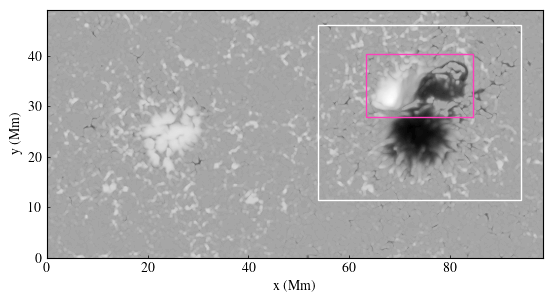

In [10]:
someX, someY = 53.76, 11.52

fig = plt.figure()
ax = fig.add_subplot(111)
C = ax.contourf(
    x_grid,
    y_grid,
    data2d.bz,
    100,
    cmap=cmap,
    # vmin = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].min(),
    # vmax = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].max(),
)
currentAxis = plt.gca()
currentAxis.add_patch(
    Rectangle(
        (someX, someY),
        40.32,
        34.56,
        fill=None,
        alpha=1,
        zorder=10,
        color="white",
        lw=1.0,
    )
)
currentAxis.add_patch(
    Rectangle(
        (63.36, 27.82), 21.12, 12.48, fill=None, alpha=1, zorder=10, color=c7, lw=1.0
    )
)
ax.set_xlabel("x (Mm)")
ax.set_ylabel("y (Mm)")
ax.tick_params(direction="in", length=2, width=0.5)
# fig.colorbar(C, shrink=0.5)
ax.set_box_aspect(data2d.ny / data2d.nx)
plotname = folder + "/magnetogram1.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

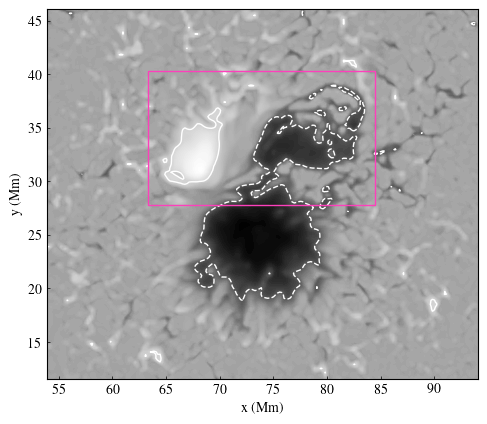

In [11]:
someX, someY = 63.36, 27.82

fig = plt.figure()
ax = fig.add_subplot(111)
C = ax.contourf(
    x_grid[60:240, 280:490],
    y_grid[60:240, 280:490],
    data2d.bz[60:240, 280:490],
    100,
    cmap=cmap,
    # vmin = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].min(),
    # vmax = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].max(),
)
CS = ax.contour(
    x_grid[60:240, 280:490],
    y_grid[60:240, 280:490],
    data2d.bz[60:240, 280:490],
    levels=(-1500, 1500),
    colors="white",
    linewidths=1.0,
)
currentAxis = plt.gca()
currentAxis.add_patch(
    Rectangle(
        (someX, someY), 21.12, 12.48, fill=None, alpha=1, zorder=10, color=c7, lw=1.0
    )
)
ax.set_xlabel("x (Mm)")
ax.set_ylabel("y (Mm)")
ax.set_box_aspect(1)
ax.tick_params(direction="in", length=2, width=0.5)
# fig.colorbar(C, shrink=0.5)
ax.set_box_aspect((240 - 60) / (490 - 280))
plotname = folder + "/magnetogram2.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

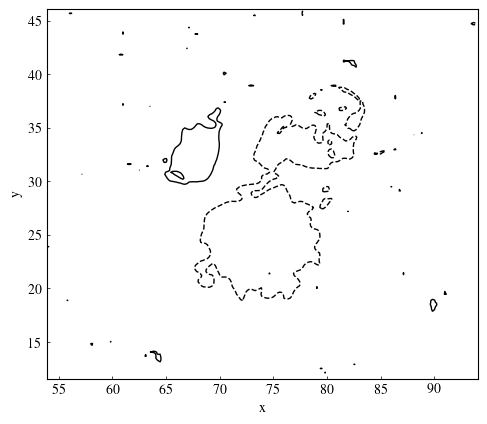

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
CS = ax.contour(
    x_grid[60:240, 280:490],
    y_grid[60:240, 280:490],
    data2d.bz[60:240, 280:490],
    levels=(-1500, 1500),
    colors="k",
    linewidths=1.0,
)

ax.set_xlabel("x")
ax.set_ylabel("y")
# ax.clabel(CS, fontsize=8, inline=True)
ax.set_box_aspect((240 - 60) / (490 - 280))
ax.tick_params(direction="in", length=2, width=0.5)
plt.show()

In [13]:
check_fluxbalance(data2d)
# So dont have to use Seeahafer

-0.0071758144

In [14]:
alpha_HS04(data_bx, data_by, data_bz)

0.010229302

In [15]:
alpha = alpha_HS04(data_bx, data_by, data_bz)

length_scale_x = nresol_x * pixelsize_x_Mm
length_scale_y = nresol_y * pixelsize_y_Mm

length_scale_x_norm = length_scale_x
length_scale_y_norm = length_scale_y

kx_arr = np.arange(nf_max) * 2.0 * np.pi / length_scale_x_norm  # [0:nf_max]
ky_arr = np.arange(nf_max) * 2.0 * np.pi / length_scale_y_norm  # [0:nf_max]
one_arr = 0.0 * np.arange(nf_max) + 1.0

ky_grid = np.outer(ky_arr, one_arr)  # [0:nf_max, 0:nf_max]
kx_grid = np.outer(one_arr, kx_arr)  # [0:nf_max, 0:nf_max]

# kx^2 + ky^2

k2_arr = np.outer(ky_arr**2, one_arr) + np.outer(one_arr, kx_arr**2)
k2_arr[0, 0] = (np.pi * 2.0 / length_scale_x_norm) ** 2 + (
    np.pi * 2.0 / length_scale_y_norm
) ** 2

# Need k^2 > alpha^2/(1-2a) and k^2 > alpha^2

limit = (k2_arr - alpha**2) / (2 * k2_arr)

amax = limit.min()

print(amax, alpha)

0.4871930823404452 0.010229302


In [16]:
a = 0.48
alpha = 0.01

In [17]:
# data3d = mhsflex.fluxbalance.calculate_magfield(data2d, 0.0, 1.0, alpha, z0, deltaz)
# data3d.save(folder)

In [18]:
data3d = mhsflex.fluxbalance.Field3dData.load(folder + "/field")
data3dLFF = mhsflex.fluxbalance.Field3dData.load(folder + "/fieldLFF")

In [19]:
path3dref = "/Users/lilli/Desktop/mflex/data/RMHD_3D_data.sav"
data3dref = scipy.io.readsav(path3dref, python_dict=True, verbose=True)

print(data3dref["info_unit"])
print(data3dref["info_pixel"])
print(data3dref["info_array"])

bx_ref = data3dref["b3dx"]
by_ref = data3dref["b3dy"]
bz_ref = data3dref["b3dz"]

pres_3d = data3dref["p3d"]  # * 10**-1
den_3d = data3dref["d3d"]  # * 10**3

bx_rec = data3d.field[:, :, :, 1]
by_rec = data3d.field[:, :, :, 0]
bz_rec = data3d.field[:, :, :, 2]
print(bx_rec.shape)
print(by_rec.shape)
print(bz_rec.shape)

issi_bx = np.zeros_like(bx_rec)
issi_by = np.zeros_like(by_rec)
issi_bz = np.zeros_like(bz_rec)

for i in range(0, nresol_y):
    for j in range(0, nresol_x):
        for k in range(0, nresol_z):
            issi_bx[i, j, k] = bx_ref[k, i, j]
            issi_by[i, j, k] = by_ref[k, i, j]
            issi_bz[i, j, k] = bz_ref[k, i, j]

B_ref = np.zeros((nresol_y, nresol_x, nresol_z, 3))

B_ref[:, :, :, 0] = issi_by[:, :, :]
B_ref[:, :, :, 1] = issi_bx[:, :, :]
B_ref[:, :, :, 2] = issi_bz[:, :, :]

--------------------------------------------------
Date: Tue Sep  6 15:19:40 2022
User: xszhu
Host: HR30
--------------------------------------------------
Format: 9
Architecture: x86_64
Operating System: linux
IDL Version: 7.1.1
--------------------------------------------------
Successfully read 12 records of which:
 - 8 are of type VARIABLE
 - 1 are of type VERSION
 - 1 are of type NOTICE
 - 1 are of type TIMESTAMP
--------------------------------------------------
Available variables:
 - b3dx [<class 'numpy.ndarray'>]
 - b3dy [<class 'numpy.ndarray'>]
 - b3dz [<class 'numpy.ndarray'>]
 - d3d [<class 'numpy.ndarray'>]
 - p3d [<class 'numpy.ndarray'>]
 - info_unit [<class 'bytes'>]
 - info_pixel [<class 'bytes'>]
 - info_array [<class 'bytes'>]
--------------------------------------------------
b'b3d, d3d, p3d: magnetic vector (Gauss), plasma density (g/cm^3), plasma pressure (dyn/cm^2)'
b'Pixel spacing: 192km*192km*64km'
b'Array example: d3d(nx,ny,nz)'
(256, 512, 650)
(256, 512, 650

In [20]:
print(
    VecCorr(B_ref[60:240, 280:490, 0:469, :], data3d.field[60:240, 280:490, 0:469, :])
)
print(
    CauSchw(B_ref[60:240, 280:490, 0:469, :], data3d.field[60:240, 280:490, 0:469, :])
)
print(
    NormErr(B_ref[60:240, 280:490, 0:469, :], data3d.field[60:240, 280:490, 0:469, :])
)
print(
    MeanErr(B_ref[60:240, 280:490, 0:469, :], data3d.field[60:240, 280:490, 0:469, :])
)
print(
    MagEnergy(B_ref[60:240, 280:490, 0:469, :], data3d.field[60:240, 280:490, 0:469, :])
)

0.895318132784582
0.9370105217492022
0.3129609235720772
0.30102891992288255
0.8015599825990279


In [21]:
print(
    VecCorr(
        B_ref[60:240, 280:490, 0:469, :], data3dLFF.field[60:240, 280:490, 0:469, :]
    )
)
print(
    CauSchw(
        B_ref[60:240, 280:490, 0:469, :], data3dLFF.field[60:240, 280:490, 0:469, :]
    )
)
print(
    NormErr(
        B_ref[60:240, 280:490, 0:469, :], data3dLFF.field[60:240, 280:490, 0:469, :]
    )
)
print(
    MeanErr(
        B_ref[60:240, 280:490, 0:469, :], data3dLFF.field[60:240, 280:490, 0:469, :]
    )
)
print(
    MagEnergy(
        B_ref[60:240, 280:490, 0:469, :], data3dLFF.field[60:240, 280:490, 0:469, :]
    )
)

0.8895905666456098
0.9374679792491974
0.312194460812607
0.3051454984739322
0.7796631341961419


In [22]:
VCarr = np.zeros_like(z_arr[0:156])
CSarr = np.zeros_like(z_arr[0:156])
NEarr = np.zeros_like(z_arr[0:156])
MEarr = np.zeros_like(z_arr[0:156])
MgEnarr = np.zeros_like(z_arr[0:156])

VCarrLFF = np.zeros_like(z_arr[0:156])
CSarrLFF = np.zeros_like(z_arr[0:156])
NEarrLFF = np.zeros_like(z_arr[0:156])
MEarrLFF = np.zeros_like(z_arr[0:156])
MgEnarrLFF = np.zeros_like(z_arr[0:156])

In [23]:
for iz in range(156):

    VCarr[iz] = VecCorr(B_ref[:, :, iz, :], data3d.field[:, :, iz, :])
    CSarr[iz] = CauSchw_z(B_ref[:, :, iz, :], data3d.field[:, :, iz, :])
    NEarr[iz] = 1 - NormErr_z(B_ref[:, :, iz, :], data3d.field[:, :, iz, :])
    MEarr[iz] = 1 - MeanErr_z(B_ref[:, :, iz, :], data3d.field[:, :, iz, :])
    MgEnarr[iz] = MagEnergy(B_ref[:, :, iz, :], data3d.field[:, :, iz, :])

    VCarrLFF[iz] = VecCorr(B_ref[:, :, iz, :], data3dLFF.field[:, :, iz, :])
    CSarrLFF[iz] = CauSchw_z(B_ref[:, :, iz, :], data3dLFF.field[:, :, iz, :])
    NEarrLFF[iz] = 1 - NormErr_z(B_ref[:, :, iz, :], data3dLFF.field[:, :, iz, :])
    MEarrLFF[iz] = 1 - MeanErr_z(B_ref[:, :, iz, :], data3dLFF.field[:, :, iz, :])
    MgEnarrLFF[iz] = MagEnergy(B_ref[:, :, iz, :], data3dLFF.field[:, :, iz, :])

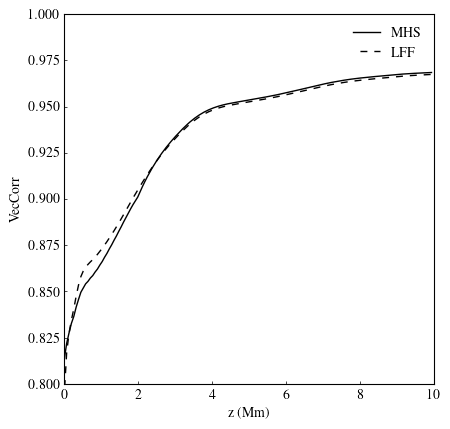

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(z_arr[0:156], VCarr, linewidth=1.0, c=c3, label="MHS")
# plt.plot(z_arr[0:156], MgEnarr, linewidth=1.0, c=c5)
# plt.plot(z_arr[0:156], CSarr, linewidth=1.0, c=c8)
# plt.plot(z_arr[0:156], 1-NEarr, linewidth=1.0, c=c4)
# plt.plot(z_arr[0:156], 1-MEarr, linewidth=1.0, c=c2)

ax.plot(z_arr[0:156], VCarrLFF, linewidth=1.0, linestyle=(5, (5, 5)), c=c3, label="LFF")
# plt.plot(z_arr[0:156], MgEnarrLFF, linewidth=1.0, linestyle="dashed", c=c5)
# plt.plot(z_arr[0:156], CSarrLFF, linewidth=1.0, linestyle="dashed", c=c8)
# plt.plot(z_arr[0:156], 1-NEarrLFF, linewidth=1.0, linestyle="dashed", c=c4)
# plt.plot(z_arr[0:156], 1-MEarrLFF, linewidth=1.0, linestyle="dashed", c=c2)
ax.set_ylim(0.8, 1.0)
ax.set_xlim(0, 10)
ax.set_xlabel("z (Mm)")
ax.set_ylabel("VecCorr")
plt.legend(frameon=False)
ax.clabel(CS, fontsize=8, inline=True)
ax.set_box_aspect(1)
ax.tick_params(direction="in", length=2, width=0.5)
plotname = folder + "/VC_z.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

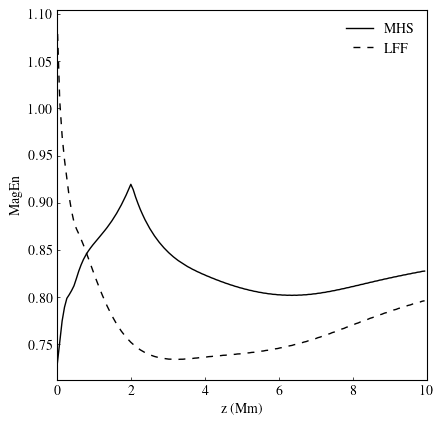

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)

# ax.plot(z_arr[0:156], VCarr, linewidth=1.0, c=c1)
plt.plot(z_arr[0:156], MgEnarr, linewidth=1.0, c=c3, label="MHS")
# plt.plot(z_arr[0:156], CSarr, linewidth=1.0, c=c8)
# plt.plot(z_arr[0:156], 1-NEarr, linewidth=1.0, c=c4)
# plt.plot(z_arr[0:156], 1-MEarr, linewidth=1.0, c=c2)

# ax.plot(z_arr[0:156], VCarrLFF, linewidth=1.0, linestyle=(5, (5,5)), c=c1)
plt.plot(
    z_arr[0:156], MgEnarrLFF, linewidth=1.0, linestyle=(5, (5, 5)), c=c3, label="LFF"
)
# plt.plot(z_arr[0:156], CSarrLFF, linewidth=1.0, linestyle=(5, (5,5)), c=c8)
# plt.plot(z_arr[0:156], 1-NEarrLFF, linewidth=1.0, linestyle=(5, (5,5)), c=c4)
# plt.plot(z_arr[0:156], 1-MEarrLFF, linewidth=1.0, linestyle=(5, (5,5)), c=c2)
# ax.set_ylim(0.8, 1.0)
ax.set_xlim(0, 10)
ax.set_xlabel("z (Mm)")
ax.set_ylabel("MagEn")
plt.legend(frameon=False)
ax.clabel(CS, fontsize=8, inline=True)
ax.set_box_aspect(1)
ax.tick_params(direction="in", length=2, width=0.5)
plotname = folder + "/MagEn_z.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

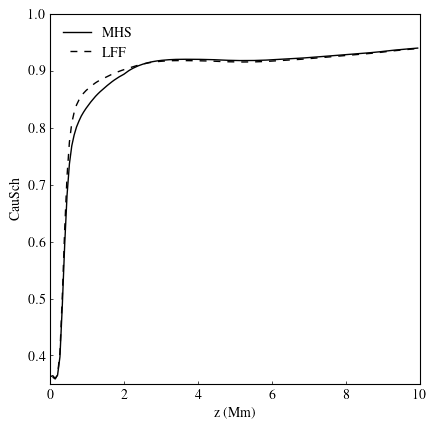

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)

# ax.plot(z_arr[0:156], VCarr, linewidth=1.0, c=c1)
# plt.plot(z_arr[0:156], MgEnarr, linewidth=1.0, c=c5)
plt.plot(z_arr[0:156], CSarr, linewidth=1.0, c=c3, label="MHS")
# plt.plot(z_arr[0:156], 1-NEarr, linewidth=1.0, c=c4)
# plt.plot(z_arr[0:156], 1-MEarr, linewidth=1.0, c=c2)

# ax.plot(z_arr[0:156], VCarrLFF, linewidth=1.0, linestyle=(5, (5,5)), c=c1)
# plt.plot(z_arr[0:156], MgEnarrLFF, linewidth=1.0, linestyle=(5, (5,5)), c=c5)
plt.plot(
    z_arr[0:156], CSarrLFF, linewidth=1.0, linestyle=(5, (5, 5)), c=c3, label="LFF"
)
# plt.plot(z_arr[0:156], 1-NEarrLFF, linewidth=1.0, linestyle=(5, (5,5)), c=c4)
# plt.plot(z_arr[0:156], 1-MEarrLFF, linewidth=1.0, linestyle=(5, (5,5)), c=c2)
ax.set_ylim(0.35, 1.0)
ax.set_xlim(0, 10)
ax.set_xlabel("z (Mm)")
plt.legend(frameon=False)
ax.set_ylabel("CauSch")
ax.clabel(CS, fontsize=8, inline=True)
ax.set_box_aspect(1)
ax.tick_params(direction="in", length=2, width=0.5)
plotname = folder + "/CS_z.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

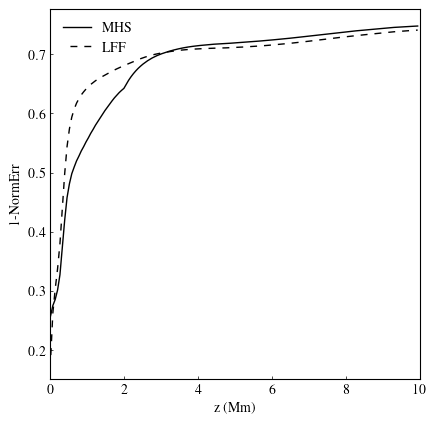

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)

# ax.plot(z_arr[0:156], VCarr, linewidth=1.0, c=c1)
# plt.plot(z_arr[0:156], MgEnarr, linewidth=1.0, c=c5)
# plt.plot(z_arr[0:156], CSarr, linewidth=1.0, c=c8, label="MHS")
plt.plot(z_arr[0:156], NEarr, linewidth=1.0, c=c3, label="MHS")
# plt.plot(z_arr[0:156], 1-MEarr, linewidth=1.0, c=c2)

# ax.plot(z_arr[0:156], VCarrLFF, linewidth=1.0, linestyle=(5, (5,5)), c=c1)
# plt.plot(z_arr[0:156], MgEnarrLFF, linewidth=1.0, linestyle=(5, (5,5)), c=c5)
# plt.plot(z_arr[0:156], CSarrLFF, linewidth=1.0, linestyle=(5, (5,5)), c=c8, label="LFF")
plt.plot(
    z_arr[0:156], NEarrLFF, linewidth=1.0, linestyle=(5, (5, 5)), c=c3, label="LFF"
)
# plt.plot(z_arr[0:156], 1-MEarrLFF, linewidth=1.0, linestyle=(5, (5,5)), c=c2)
# ax.set_ylim(0.35, 1.0)
ax.set_xlim(0, 10)
ax.set_xlabel("z (Mm)")
ax.set_ylabel("1-NormErr")
ax.clabel(CS, fontsize=8, inline=True)
plt.legend(frameon=False)
ax.set_box_aspect(1)
ax.tick_params(direction="in", length=2, width=0.5)
plotname = folder + "/NE_z.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

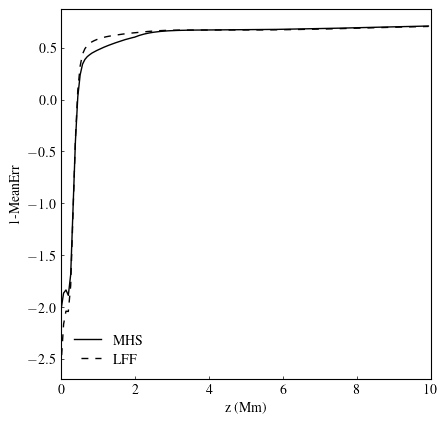

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)

# ax.plot(z_arr[0:156], VCarr, linewidth=1.0, c=c1)
# plt.plot(z_arr[0:156], MgEnarr, linewidth=1.0, c=c5)
# plt.plot(z_arr[0:156], CSarr, linewidth=1.0, c=c8, label="MHS")
# plt.plot(z_arr[0:156], NEarr, linewidth=1.0, c=c4, label="MHS")
plt.plot(z_arr[0:156], MEarr, linewidth=1.0, c=c3, label="MHS")

# ax.plot(z_arr[0:156], VCarrLFF, linewidth=1.0, linestyle=(5, (5,5)), c=c1)
# plt.plot(z_arr[0:156], MgEnarrLFF, linewidth=1.0, linestyle=(5, (5,5)), c=c5)
# plt.plot(z_arr[0:156], CSarrLFF, linewidth=1.0, linestyle=(5, (5,5)), c=c8, label="LFF")
# plt.plot(z_arr[0:156], NEarrLFF, linewidth=1.0, linestyle=(5, (5,5)), c=c4, label="LFF")
plt.plot(
    z_arr[0:156], MEarrLFF, linewidth=1.0, linestyle=(5, (5, 5)), c=c3, label="LFF"
)
# ax.set_ylim(0.35, 1.0)
ax.set_xlim(0, 10)
ax.set_xlabel("z (Mm)")
ax.set_ylabel("1-MeanErr")
ax.clabel(CS, fontsize=8, inline=True)
plt.legend(frameon=False)
ax.set_box_aspect(1)
ax.tick_params(direction="in", length=2, width=0.5)
plotname = folder + "/ME_z.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

In [29]:
# field_div_metric_issi2(B_ref[60:240, 280:490, 0:469, :], data3d)

In [30]:
from msat.pyvis.fieldline3d import fieldline3d

In [31]:
h1 = 1.0 / 100.0  # Initial step length for fieldline3D
eps = 1.0e-8
# Tolerance to which we require point on field line known for fieldline3D
hmin = 0.0  # Minimum step length for fieldline3D
hmax = 1.0  # Maximum step length for fieldline3D

xmin, xmax, ymin, ymax, zmin, zmax = (
    data3d.x[280],
    data3d.x[490],
    data3d.y[60],
    data3d.y[240],
    data3d.z[0],
    data3d.z[469],
)

boxedges = np.zeros((2, 3))

# Y boundaries must come first, X second due to switched order explained above

boxedges[0, 0] = ymin
boxedges[1, 0] = ymax
boxedges[0, 1] = xmin
boxedges[1, 1] = xmax
boxedges[0, 2] = zmin
boxedges[1, 2] = zmax

# set fieldline3D initial stepsize
h1_ref = h1
h1_rec = h1

# counter for number of footpoints that have an error in the endpoints smaller than 10 percent of field line length in reference model
count = 0

# counter for number of field lines that are closed within box
count_closed = 0

# counter for all field lines
count_all = 0

/var/folders/cr/r56x0z910tncp30pdz4343cm0000gn/T/ipykernel_16905/1688680083.py:126: RuntimeWarning: invalid value encountered in scalar divide
  temp = num / div


7150 5998 2307


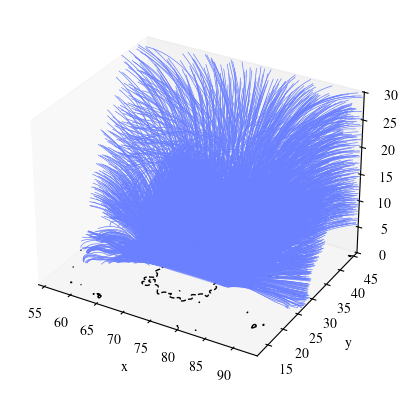

0.38462820940313436

In [32]:
fig = plt.figure()
ax = fig.figure.add_subplot(111, projection="3d")
CS = ax.contour(
    x_grid[60:240, 280:490],
    y_grid[60:240, 280:490],
    data2d.bz[60:240, 280:490],
    levels=(-1500, 1500),
    colors="k",
    linewidths=1.0,
    offset=0.0,
)

ax.set_xlabel("x")
ax.set_ylabel("y")

for ix in range(0,440-330,1):
    for iy in range(0,210-145, 1):

        # ax.scatter(data3d.x[330+ix], data3d.y[145+iy], s=0.1)

        count_all = count_all + 1

        # Footpoint
        x_start = (330+ix)/ (data3d.nx / xmax)
        y_start = (145+iy) / (data3d.ny / ymax)
        ystart = [y_start, x_start, 0.0]

        if B_ref[int(y_start), int(x_start), 0, 2] < 0.0:
                h1_ref = -h1_ref
            # decide direction of fieldline for reconstruction model
        if data3d.field[int(y_start), int(x_start), 0, 2] < 0.0:
            h1_rec = -h1_rec

        # Fieldline3D expects startpt, BField, Row values, Column values so we need to give Y first, then X

        # Get fieldline coordinates for reference model
        fieldline_ref = fieldline3d(
            ystart,
            B_ref,
            data3d.y,
            data3d.x,
            z_arr,
            h1_ref,
            hmin,
            hmax,
            eps,
            oneway=False,
            boxedge=boxedges,
            gridcoord=False,
            coordsystem="cartesian",
        )

        # Get fieldline coordinates for reconstruction model
        fieldline_rec = fieldline3d(
            ystart,
            data3d.field,
            data3d.y,
            data3d.x,
            z_arr,
            h1_rec,
            hmin,
            hmax,
            eps,
            oneway=False,
            boxedge=boxedges,
            gridcoord=False,
            coordsystem="cartesian",
        )

        ax.plot(
            fieldline_ref[:, 1],
            fieldline_ref[:, 0],
            fieldline_ref[:, 2],
            color=c2,
            linewidth=0.5,
            zorder=4000,
        )

        len_ref = len(fieldline_ref)
        len_rec = len(fieldline_rec)

        valid_fieldline = True

        # Check if field lines end on bottom boundary
        if not np.isclose(fieldline_ref[len_ref - 1, 2], 0.0):
            valid_fieldline = False
        if not np.isclose(fieldline_rec[len_rec - 1, 2], 0.0):
            valid_fieldline = False

        if not (0.0 <= fieldline_ref[len_ref - 1, 1] <= xmax):
            valid_fieldline = False
        if not (0.0 <= fieldline_rec[len_rec - 1, 1] <= xmax):
            valid_fieldline = False
        if not (0.0 <= fieldline_ref[len_ref - 1, 0] <= ymax):
            valid_fieldline = False
        if not (0.0 <= fieldline_rec[len_rec - 1, 0] <= ymax):
            valid_fieldline = False

        if valid_fieldline:

            # add to counter if field line is closed field line within box
            count_closed = count_closed + 1

            # calculate distance between the endpoints of reference field line and of reconstructed field line
            num = np.sqrt(
                (fieldline_rec[len_rec - 1, 1] - fieldline_ref[len_ref - 1, 1])
                ** 2.0
                + (fieldline_rec[len_rec - 1, 0] - fieldline_ref[len_ref - 1, 0])
                ** 2.0
                + (fieldline_rec[len_rec - 1, 2] - fieldline_ref[len_ref - 1, 2])
                ** 2.0
            )

            # calculate length of reference field line
            div = 0.0
            for i in range(0, len_ref - 1):
                div = div + np.sqrt(
                    (fieldline_ref[i, 1] - fieldline_ref[i + 1, 1]) ** 2.0
                    + (fieldline_ref[i, 0] - fieldline_ref[i + 1, 0]) ** 2.0
                    + (fieldline_ref[i, 2] - fieldline_ref[i + 1, 2]) ** 2.0
                )

            # divide distance between endpoints by length of reference field line
            # gives error between endpoints as percentage of length of reference field line

            temp = num / div

            # add to counter if error is smaller than 10 percent
            if temp <= 0.1:
                count = count + 1

print(count_all, count_closed, count)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")  # type: ignore
ax.grid(False)
ax.set_zlim(zmin, zmax)  # type: ignore
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_box_aspect((xmax-xmin, ymax-ymin, zmax))
plt.show()

np.float64(count / count_closed)

/var/folders/cr/r56x0z910tncp30pdz4343cm0000gn/T/ipykernel_16905/2005979635.py:165: RuntimeWarning: invalid value encountered in scalar divide
  temp = num / div


7150 5992 2326


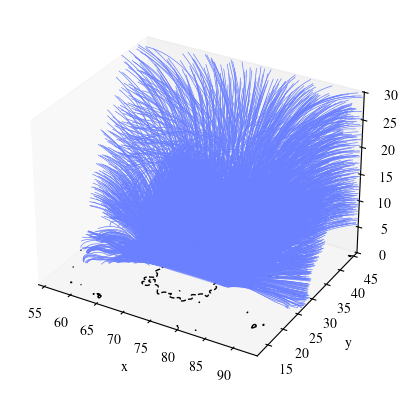

0.38818424566088117

In [71]:
h1 = 1.0 / 100.0  # Initial step length for fieldline3D
eps = 1.0e-8
# Tolerance to which we require point on field line known for fieldline3D
hmin = 0.0  # Minimum step length for fieldline3D
hmax = 1.0  # Maximum step length for fieldline3D

xmin, xmax, ymin, ymax, zmin, zmax = (
    data3d.x[280],
    data3d.x[490],
    data3d.y[60],
    data3d.y[240],
    data3d.z[0],
    data3d.z[469],
)

boxedges = np.zeros((2, 3))

# Y boundaries must come first, X second due to switched order explained above

boxedges[0, 0] = ymin
boxedges[1, 0] = ymax
boxedges[0, 1] = xmin
boxedges[1, 1] = xmax
boxedges[0, 2] = zmin
boxedges[1, 2] = zmax

# set fieldline3D initial stepsize
h1_ref = h1
h1_rec = h1

# counter for number of footpoints that have an error in the endpoints smaller than 10 percent of field line length in reference model
count = 0

# counter for number of field lines that are closed within box
count_closed = 0

# counter for all field lines
count_all = 0

fig = plt.figure()
ax = fig.figure.add_subplot(111, projection="3d")
CS = ax.contour(
    x_grid[60:240, 280:490],
    y_grid[60:240, 280:490],
    data2d.bz[60:240, 280:490],
    levels=(-1500, 1500),
    colors="k",
    linewidths=1.0,
    offset=0.0,
)

ax.set_xlabel("x")
ax.set_ylabel("y")

for ix in range(0,440-330,1):
    for iy in range(0,210-145, 1):

        # ax.scatter(data3d.x[330+ix], data3d.y[145+iy], s=0.1)

        count_all = count_all + 1

        # Footpoint
        x_start = (330+ix)/ (data3d.nx / xmax)
        y_start = (145+iy) / (data3d.ny / ymax)
        ystart = [y_start, x_start, 0.0]

        if B_ref[int(y_start), int(x_start), 0, 2] < 0.0:
                h1_ref = -h1_ref
            # decide direction of fieldline for reconstruction model
        if data3d.field[int(y_start), int(x_start), 0, 2] < 0.0:
            h1_rec = -h1_rec

        # Fieldline3D expects startpt, BField, Row values, Column values so we need to give Y first, then X

        # Get fieldline coordinates for reference model
        fieldline_ref = fieldline3d(
            ystart,
            B_ref,
            data3d.y,
            data3d.x,
            z_arr,
            h1_ref,
            hmin,
            hmax,
            eps,
            oneway=False,
            boxedge=boxedges,
            gridcoord=False,
            coordsystem="cartesian",
        )

        # Get fieldline coordinates for reconstruction model
        fieldline_rec = fieldline3d(
            ystart,
            data3dLFF.field,
            data3d.y,
            data3d.x,
            z_arr,
            h1_rec,
            hmin,
            hmax,
            eps,
            oneway=False,
            boxedge=boxedges,
            gridcoord=False,
            coordsystem="cartesian",
        )

        ax.plot(
            fieldline_ref[:, 1],
            fieldline_ref[:, 0],
            fieldline_ref[:, 2],
            color=c2,
            linewidth=0.5,
            zorder=4000,
        )

        len_ref = len(fieldline_ref)
        len_rec = len(fieldline_rec)

        valid_fieldline = True

        # Check if field lines end on bottom boundary
        if not np.isclose(fieldline_ref[len_ref - 1, 2], 0.0):
            valid_fieldline = False
        if not np.isclose(fieldline_rec[len_rec - 1, 2], 0.0):
            valid_fieldline = False

        if not (0.0 <= fieldline_ref[len_ref - 1, 1] <= xmax):
            valid_fieldline = False
        if not (0.0 <= fieldline_rec[len_rec - 1, 1] <= xmax):
            valid_fieldline = False
        if not (0.0 <= fieldline_ref[len_ref - 1, 0] <= ymax):
            valid_fieldline = False
        if not (0.0 <= fieldline_rec[len_rec - 1, 0] <= ymax):
            valid_fieldline = False

        if valid_fieldline:

            # add to counter if field line is closed field line within box
            count_closed = count_closed + 1

            # calculate distance between the endpoints of reference field line and of reconstructed field line
            num = np.sqrt(
                (fieldline_rec[len_rec - 1, 1] - fieldline_ref[len_ref - 1, 1])
                ** 2.0
                + (fieldline_rec[len_rec - 1, 0] - fieldline_ref[len_ref - 1, 0])
                ** 2.0
                + (fieldline_rec[len_rec - 1, 2] - fieldline_ref[len_ref - 1, 2])
                ** 2.0
            )

            # calculate length of reference field line
            div = 0.0
            for i in range(0, len_ref - 1):
                div = div + np.sqrt(
                    (fieldline_ref[i, 1] - fieldline_ref[i + 1, 1]) ** 2.0
                    + (fieldline_ref[i, 0] - fieldline_ref[i + 1, 0]) ** 2.0
                    + (fieldline_ref[i, 2] - fieldline_ref[i + 1, 2]) ** 2.0
                )

            # divide distance between endpoints by length of reference field line
            # gives error between endpoints as percentage of length of reference field line

            temp = num / div

            # add to counter if error is smaller than 10 percent
            if temp <= 0.1:
                count = count + 1

print(count_all, count_closed, count)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")  # type: ignore
ax.grid(False)
ax.set_zlim(zmin, zmax)  # type: ignore
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_box_aspect((xmax-xmin, ymax-ymin, zmax))
plt.show()

np.float64(count / count_closed)

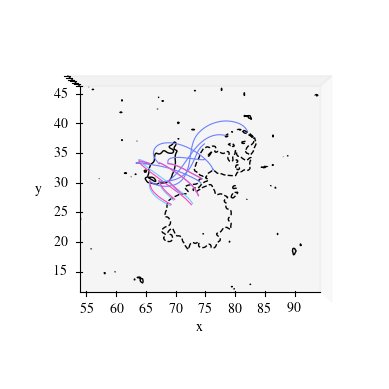

In [36]:
fig = plt.figure()
ax = fig.figure.add_subplot(111, projection="3d")
CS = ax.contour(
    x_grid[60:240, 280:490],
    y_grid[60:240, 280:490],
    data2d.bz[60:240, 280:490],
    levels=(-1500, 1500),
    colors="k",
    linewidths=1.0,
    offset=0.0,
)

ax.set_xlabel("x")
ax.set_ylabel("y")

for ix in range(12, 33, 8): 
    for iy in range(13, 37, 15): 
        
        #ax.scatter(data3d.x[330+ix], data3d.y[145+iy], c=c2, s=0.8, facecolors='none')

        # Footpoint
        x_start = (330+ix) / (data3d.nx / data3d.x[-1])
        y_start = (145+iy) / (data3d.ny / data3d.y[-1])
        ystart = [y_start, x_start, 0.0]
        
        # ax.scatter(x_start, y_start, c=c4)

        if B_ref[int(y_start), int(x_start), 0, 2] < 0.0:
                h1_ref = -h1_ref
            # decide direction of fieldline for reconstruction model
        if data3d.field[int(y_start), int(x_start), 0, 2] < 0.0:
            h1_rec = -h1_rec

        # Fieldline3D expects startpt, BField, Row values, Column values so we need to give Y first, then X

        # Get fieldline coordinates for reference model
        fieldline_ref = fieldline3d(
            ystart,
            B_ref,
            data3d.y,
            data3d.x,
            z_arr,
            h1_ref,
            hmin,
            hmax,
            eps,
            oneway=False,
            boxedge=boxedges,
            gridcoord=False,
            coordsystem="cartesian",
        )

        # # Get fieldline coordinates for reconstruction model
        fieldline_rec = fieldline3d(
            ystart,
            data3dLFF.field,
            data3d.y,
            data3d.x,
            z_arr,
            h1_rec,
            hmin,
            hmax,
            eps,
            oneway=False,
            boxedge=boxedges,
            gridcoord=False,
            coordsystem="cartesian",
        )

        fieldline_rec2 = fieldline3d(
            ystart,
            data3d.field,
            data3d.y,
            data3d.x,
            z_arr,
            h1_rec,
            hmin,
            hmax,
            eps,
            oneway=False,
            boxedge=boxedges,
            gridcoord=False,
            coordsystem="cartesian",
        )

        ax.plot(
            fieldline_ref[:, 1],
            fieldline_ref[:, 0],
            fieldline_ref[:, 2],
            color=c2,
            linewidth=0.8,
            zorder=4000,
        )

        ax.plot(
            fieldline_rec[:, 1],
            fieldline_rec[:, 0],
            fieldline_rec[:, 2],
            color=c1,
            linewidth=0.8,
            zorder=4000,
        )

        ax.plot(
            fieldline_rec2[:, 1],
            fieldline_rec2[:, 0],
            fieldline_rec2[:, 2],
            color=c7,
            linewidth=0.8,
            zorder=4000,
        )

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")  # type: ignore
ax.grid(False)
ax.set_zlim(zmin, zmax)  # type: ignore
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_box_aspect((xmax-xmin, ymax-ymin, zmax))

ax.view_init(90, -90)  # type: ignore

ax.set_zticklabels([])  # type: ignore
ax.set_zlabel("")  # type: ignore

[t.set_va("center") for t in ax.get_yticklabels()]  # type: ignore
[t.set_ha("center") for t in ax.get_yticklabels()]  # type: ignore

[t.set_va("center") for t in ax.get_xticklabels()]  # type: ignore
[t.set_ha("center") for t in ax.get_xticklabels()]  # type: ignore

plotname = folder + "/fieldline_comp.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight")
plt.show()


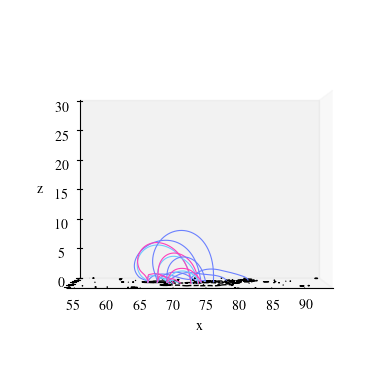

In [37]:


fig = plt.figure()
ax = fig.figure.add_subplot(111, projection="3d")
CS = ax.contour(
    x_grid[60:240, 280:490],
    y_grid[60:240, 280:490],
    data2d.bz[60:240, 280:490],
    levels=(-1500, 1500),
    colors="k",
    linewidths=1.0,
    offset=0.0,
)

ax.set_xlabel("x")
ax.set_ylabel("y")

for ix in range(12, 33, 8): 
    for iy in range(13, 37, 15): 
        
        #ax.scatter(data3d.x[330+ix], data3d.y[145+iy], c=c2, s=0.8, facecolors='none')

        # Footpoint
        x_start = (330+ix) / (data3d.nx / data3d.x[-1])
        y_start = (145+iy) / (data3d.ny / data3d.y[-1])
        ystart = [y_start, x_start, 0.0]
        
        # ax.scatter(x_start, y_start, c=c4)

        if B_ref[int(y_start), int(x_start), 0, 2] < 0.0:
                h1_ref = -h1_ref
            # decide direction of fieldline for reconstruction model
        if data3d.field[int(y_start), int(x_start), 0, 2] < 0.0:
            h1_rec = -h1_rec

        # Fieldline3D expects startpt, BField, Row values, Column values so we need to give Y first, then X

        # Get fieldline coordinates for reference model
        fieldline_ref = fieldline3d(
            ystart,
            B_ref,
            data3d.y,
            data3d.x,
            z_arr,
            h1_ref,
            hmin,
            hmax,
            eps,
            oneway=False,
            boxedge=boxedges,
            gridcoord=False,
            coordsystem="cartesian",
        )

        # # Get fieldline coordinates for reconstruction model
        fieldline_rec = fieldline3d(
            ystart,
            data3dLFF.field,
            data3d.y,
            data3d.x,
            z_arr,
            h1_rec,
            hmin,
            hmax,
            eps,
            oneway=False,
            boxedge=boxedges,
            gridcoord=False,
            coordsystem="cartesian",
        )

        fieldline_rec2 = fieldline3d(
            ystart,
            data3d.field,
            data3d.y,
            data3d.x,
            z_arr,
            h1_rec,
            hmin,
            hmax,
            eps,
            oneway=False,
            boxedge=boxedges,
            gridcoord=False,
            coordsystem="cartesian",
        )

        ax.plot(
            fieldline_ref[:, 1],
            fieldline_ref[:, 0],
            fieldline_ref[:, 2],
            color=c2,
            linewidth=0.8,
            zorder=4000,
        )

        ax.plot(
            fieldline_rec[:, 1],
            fieldline_rec[:, 0],
            fieldline_rec[:, 2],
            color=c1,
            linewidth=0.8,
            zorder=4000,
        )

        ax.plot(
            fieldline_rec2[:, 1],
            fieldline_rec2[:, 0],
            fieldline_rec2[:, 2],
            color=c7,
            linewidth=0.8,
            zorder=4000,
        )

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")  # type: ignore
ax.grid(False)
ax.set_zlim(zmin, zmax)  # type: ignore
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_box_aspect((xmax-xmin, ymax-ymin, zmax))

ax.view_init(0, -90)  # type: ignore

ax.set_yticklabels([])  # type: ignore
ax.set_ylabel("")  # type: ignore

[t.set_va("center") for t in ax.get_yticklabels()]  # type: ignore
[t.set_ha("center") for t in ax.get_yticklabels()]  # type: ignore

[t.set_va("center") for t in ax.get_xticklabels()]  # type: ignore
[t.set_ha("center") for t in ax.get_xticklabels()]  # type: ignore

plotname = folder + "/fieldline_comp2.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight")
plt.show()

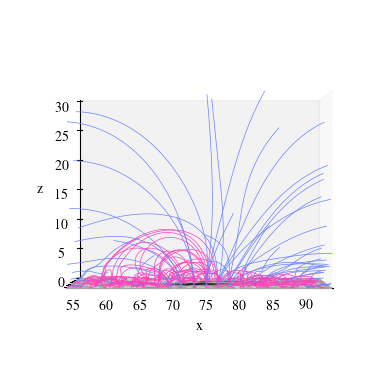

In [72]:
fig = plt.figure()
ax = fig.figure.add_subplot(111, projection="3d")
CS = ax.contourf(
    x_grid[60:240, 280:490],
    y_grid[60:240, 280:490],
    data2d.bz[60:240, 280:490],
    levels=100,
    cmap=cmap,
    offset=0.0,
)

ax.set_xlabel("x")
ax.set_ylabel("y")

for ix in range(1, 490-280, 10): 
    for iy in range(1, 240-60, 10): 
        
        #ax.scatter(data3d.x[330+ix], data3d.y[145+iy], c=c2, s=0.8, facecolors='none')

        # Footpoint
        x_start = (280+ix) / (data3d.nx / data3d.x[-1])
        y_start = (60+iy) / (data3d.ny / data3d.y[-1])
        ystart = [y_start, x_start, 0.0]
        
        #ax.scatter(x_start, y_start, c=c4,s = 1.)

        if B_ref[int(y_start), int(x_start), 0, 2] < 0.0:
                h1_ref = -h1_ref
            # decide direction of fieldline for reconstruction model
        if data3d.field[int(y_start), int(x_start), 0, 2] < 0.0:
            h1_rec = -h1_rec

        # # Fieldline3D expects startpt, BField, Row values, Column values so we need to give Y first, then X

        # # Get fieldline coordinates for reference model
        # fieldline = fieldline3d(
        #     ystart,
        #     B_ref,
        #     data3d.y,
        #     data3d.x,
        #     z_arr,
        #     h1_ref,
        #     hmin,
        #     hmax,
        #     eps,
        #     oneway=False,
        #     boxedge=boxedges,
        #     gridcoord=False,
        #     coordsystem="cartesian",
        # )

        # # # Get fieldline coordinates for reconstruction model
        # fieldline = fieldline3d(
        #     ystart,
        #     data3dLFF.field,
        #     data3d.y,
        #     data3d.x,
        #     z_arr,
        #     h1_rec,
        #     hmin,
        #     hmax,
        #     eps,
        #     oneway=False,
        #     boxedge=boxedges,
        #     gridcoord=False,
        #     coordsystem="cartesian",
        # )

        fieldline = fieldline3d(
            ystart,
            data3d.field,
            data3d.y,
            data3d.x,
            z_arr,
            h1_rec,
            hmin,
            hmax,
            eps,
            oneway=False,
            boxedge=boxedges,
            gridcoord=False,
            coordsystem="cartesian",
        )

        if np.isclose(fieldline[:, 2][-1], 0.0) and np.isclose(
                fieldline[:, 2][0], 0.0
            ):
            # Need to give row direction first/ Y, then column direction/ X
            ax.plot(
                fieldline[:, 1],
                fieldline[:, 0],
                fieldline[:, 2],
                color=c7,
                linewidth=0.5,
                zorder=4000,
            )
        else:
            ax.plot(
                fieldline[:, 1],
                fieldline[:, 0],
                fieldline[:, 2],
                color=c2,
                linewidth=0.5,
                zorder=4000,
            )

        # # ax.plot(
        # #     fieldline_rec[:, 1],
        # #     fieldline_rec[:, 0],
        # #     fieldline_rec[:, 2],
        # #     color=c8,
        # #     linewidth=1.0,
        # #     zorder=4000,
        # # )

        # # ax.plot(
        # #     fieldline_rec2[:, 1],
        # #     fieldline_rec2[:, 0],
        # #     fieldline_rec2[:, 2],
        # #     color=c7,
        # #     linewidth=1.0,
        # #     zorder=4000,
        # # )

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")  # type: ignore
ax.grid(False)
ax.set_zlim(zmin, zmax)  # type: ignore
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_box_aspect((xmax-xmin, ymax-ymin, zmax))

ax.view_init(0, -90)  # type: ignore

ax.set_yticklabels([])  # type: ignore
ax.set_ylabel("")  # type: ignore

[t.set_va("center") for t in ax.get_yticklabels()]  # type: ignore
[t.set_ha("center") for t in ax.get_yticklabels()]  # type: ignore

[t.set_va("center") for t in ax.get_xticklabels()]  # type: ignore
[t.set_ha("center") for t in ax.get_xticklabels()]  # type: ignore

plotname = folder + "/fieldline_MHS.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight")
plt.show()


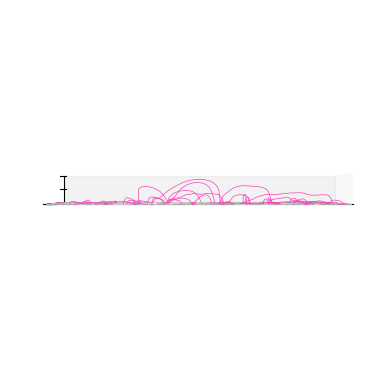

In [93]:
h1 = 1.0 / 100.0  # Initial step length for fieldline3D
eps = 1.0e-8
# Tolerance to which we require point on field line known for fieldline3D
hmin = 0.0  # Minimum step length for fieldline3D
hmax = 1.0  # Maximum step length for fieldline3D

xmin, xmax, ymin, ymax, zmin, zmax = (
    data3d.x[280],
    data3d.x[490],
    data3d.y[60],
    data3d.y[240],
    data3d.z[0],
    data3d.z[469],
)

boxedges = np.zeros((2, 3))

# Y boundaries must come first, X second due to switched order explained above

boxedges[0, 0] = ymin
boxedges[1, 0] = ymax
boxedges[0, 1] = xmin
boxedges[1, 1] = xmax
boxedges[0, 2] = zmin
boxedges[1, 2] = 2 * data3d.z0  # FOR ZOOM


fig = plt.figure()
ax = fig.figure.add_subplot(111, projection="3d")
CS = ax.contourf(
    x_grid[60:240, 280:490],
    y_grid[60:240, 280:490],
    data2d.bz[60:240, 280:490],
    levels=100,
    cmap=cmap,
    offset=0.0,
)
ax.set_zlim(zmin, 2 * data3d.z0)
ax.set_zticks(np.arange(0, 2 * data3d.z0 + 1, 2))
ax.set_box_aspect((xmax, ymax, 4 * data3d.z0))

ax.set_xlabel("x")
ax.set_ylabel("y")

for ix in range(1, 490-280, 20): 
    for iy in range(1, 240-60, 20): 
        
        #ax.scatter(data3d.x[330+ix], data3d.y[145+iy], c=c2, s=0.8, facecolors='none')

        # Footpoint
        x_start = (280+ix) / (data3d.nx / data3d.x[-1])
        y_start = (60+iy) / (data3d.ny / data3d.y[-1])
        ystart = [y_start, x_start, 0.0]
        
        #ax.scatter(x_start, y_start, c=c4,s = 1.)

        if B_ref[int(y_start), int(x_start), 0, 2] < 0.0:
                h1_ref = -h1_ref
            # decide direction of fieldline for reconstruction model
        if data3d.field[int(y_start), int(x_start), 0, 2] < 0.0:
            h1_rec = -h1_rec

        # # Fieldline3D expects startpt, BField, Row values, Column values so we need to give Y first, then X

        # # Get fieldline coordinates for reference model
        # fieldline = fieldline3d(
        #     ystart,
        #     B_ref,
        #     data3d.y,
        #     data3d.x,
        #     z_arr,
        #     h1_ref,
        #     hmin,
        #     hmax,
        #     eps,
        #     oneway=False,
        #     boxedge=boxedges,
        #     gridcoord=False,
        #     coordsystem="cartesian",
        # )

        # # # Get fieldline coordinates for reconstruction model
        # fieldline = fieldline3d(
        #     ystart,
        #     data3dLFF.field,
        #     data3d.y,
        #     data3d.x,
        #     z_arr,
        #     h1_rec,
        #     hmin,
        #     hmax,
        #     eps,
        #     oneway=False,
        #     boxedge=boxedges,
        #     gridcoord=False,
        #     coordsystem="cartesian",
        # )

        fieldline = fieldline3d(
            ystart,
            data3d.field,
            data3d.y,
            data3d.x,
            z_arr,
            h1_rec,
            hmin,
            hmax,
            eps,
            oneway=False,
            boxedge=boxedges,
            gridcoord=False,
            coordsystem="cartesian",
        )

        if np.isclose(fieldline[:, 2][-1], 0.0) and np.isclose(
                fieldline[:, 2][0], 0.0
            ):
            # Need to give row direction first/ Y, then column direction/ X
            ax.plot(
                fieldline[:, 1],
                fieldline[:, 0],
                fieldline[:, 2],
                color=c7,
                linewidth=0.5,
                zorder=4000,
            )
        # else:
        #     ax.plot(
        #         fieldline[:, 1],
        #         fieldline[:, 0],
        #         fieldline[:, 2],
        #         color=c2,
        #         linewidth=0.5,
        #         zorder=4000,
        #     )

        # # ax.plot(
        # #     fieldline_rec[:, 1],
        # #     fieldline_rec[:, 0],
        # #     fieldline_rec[:, 2],
        # #     color=c8,
        # #     linewidth=1.0,
        # #     zorder=4000,
        # # )

        # # ax.plot(
        # #     fieldline_rec2[:, 1],
        # #     fieldline_rec2[:, 0],
        # #     fieldline_rec2[:, 2],
        # #     color=c7,
        # #     linewidth=1.0,
        # #     zorder=4000,
        # # )

ax.set_xlabel("x", labelpad=55)
ax.set_zlabel("z", labelpad=10)  # type: ignore

ax.grid(False)
ax.set_zlim(zmin, 2*z0)  # type: ignore
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_box_aspect((xmax-xmin, ymax-ymin, 2*z0))

ax.view_init(0, -90)  # type: ignore

ax.set_yticklabels([])  # type: ignore
ax.set_ylabel("")  # type: ignore
ax.set_xticklabels([])  # type: ignore
ax.set_xlabel("")  # type: ignore
ax.set_zticklabels([])  # type: ignore
ax.set_zlabel("")  # type: ignore
# plotname = folder + "/fieldline_MHS3.png"
# plt.savefig(plotname, dpi=300, bbox_inches="tight")
plt.show()